In [72]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv("train.csv") # get MNIST dataset

In [74]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
data = np.array(data) # convert data into matrices 
m, n = data.shape
np.random.shuffle(data) # shuffles data 

In [76]:
data_util = data[0:1000].T # store data for development
X_util = data_util[1:n]
X_util = X_util /255.
Y_util = data_util[0]

In [77]:
data_train = data[1000:m].T # store data for training
X_train = data_train[1:n]
X_train = X_train /255.
Y_train = data_train[0]

In [78]:
# defining weights and biases for the hidden and output layers
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    B1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    return W1, B1, W2, B2

In [79]:
# ReLU activation function 
def ReLU(Z):
    return np.maximum(Z, 0)

In [80]:
# Softmax actiation function to normalize output
def softmax(Z): 
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)

In [81]:
# running data from input layer to output layer in the neural network
def forward_propagation(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [82]:
# representing digits from 0 - 9 as binary vectors
def one_hot_encode(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) 
    one_hot_Y[np.arange(Y.size), Y] = 1  # sets all values of the array to 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [83]:
# derivative of ReLU
def deriv_ReLU(Z):
    return Z > 0

In [84]:
# move from output layer to input layer in the neural network
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot_encode(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    dB2 = (1 / m) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    dB1 = (1 / m) * np.sum(dZ2)
    return dW1, dB1, dW2, dB2

In [85]:
# update parameter after training
def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    # alpha is learning rate
    W1 -= alpha * dW1
    B1 -= alpha * dB1
    W2 -= alpha * dW2
    B2 -= alpha * dB2
    return W1, B1, W2, B2

In [86]:
def get_prediction(A2):
    return np.argmax(A2, 0)

In [87]:
def get_accuracy(prediction, Y):
    print(prediction, Y)
    return np.sum(prediction == Y) / Y.size

In [88]:
# utilizing gradient descent to train the neural network
def gradient_descent(X, Y, iterations, alpha):
    W1, B1, W2, B2 = init_params() # initalize parameters
    for i in range(iterations): 
        Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X) # conduct forward propagation
        dW1, dB1, dW2, dB2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y) # conduct backward propagation
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha) # update parameters after training
        if i % 10 == 0: # print iteration # and accuracy if iteration is a multiple of 10
            print("Iteration: ", i)
            pred = get_prediction(A2)
            print(get_accuracy(pred, Y))
    return W1, B1, W2, B2

In [106]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 500, 0.1) # 500 iterations and 0.1 learning rate

Iteration:  0
[4 0 0 ... 4 4 0] [3 2 1 ... 8 4 1]
0.1108780487804878
Iteration:  10
[4 3 1 ... 6 4 1] [3 2 1 ... 8 4 1]
0.3685609756097561
Iteration:  20
[2 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.5227804878048781
Iteration:  30
[2 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.5591951219512196
Iteration:  40
[2 2 1 ... 8 8 1] [3 2 1 ... 8 4 1]
0.5471707317073171
Iteration:  50
[3 2 1 ... 8 8 1] [3 2 1 ... 8 4 1]
0.6155365853658537
Iteration:  60
[3 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.6495853658536586
Iteration:  70
[3 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.6924634146341463
Iteration:  80
[3 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.7224146341463414
Iteration:  90
[3 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.748219512195122
Iteration:  100
[3 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.7658536585365854
Iteration:  110
[3 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.7811951219512195
Iteration:  120
[3 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.792609756097561
Iteration:  130
[3 2 1 ... 8 4 1] [3 2 1 ... 8 4 1]
0.8029268292682927
Iteration:  140
[3 

In [93]:
def init_predictions(W1, B1, W2, B2, X):
    _,_,_, A2 = forward_propagation(W1, B1, W2, B2, X)
    pred = get_prediction(A2)
    return pred

In [91]:
def test_predictions(W1, B1, W2, B2, index):
    current_img = X_train[:, index, None]
    pred = init_predictions(W1, B1, W2, B2, X_train[:, index, None])
    label = Y_train[index]
    print("Prediction: ", pred)
    print("Label: ", label)
    
    current_img = current_img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_img, interpolation="nearest")
    plt.show()

Prediction:  [6]
Label:  6


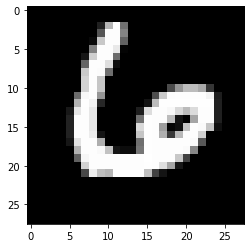

In [134]:
from numpy import random
test_predictions(W1, B1, W2, B2, random.randint(1000))